# 🌟 Introduction

# Support Vector Machine Regression

Support Vector Machines (SVM) are popularly and widely used for classification problems in machine learning. Support Vector Machines are very specific class of algorithms, characterized by usage of kernels, absence of local minima, sparseness of the solution and capacity control obtained by acting on the margin, or on number of support vectors, etc.

<img src='img/svr_1.png'>

## Here’s what we’ll cover in this Support Vector Regression tutorial:

<ul>
    <li>What is a Support Vector Machine (SVM)?</li>
    <li>Hyperparameters of the Support Vector Machine Algorithm</li>
    <li>Introduction to Support Vector Regression (SVR)</li>
    <li>Implementing Support Vector Regression in Python</li>
</ul>

# 🤔 What is a Support Vector Machine (SVM)?

So what exactly is Support Vector Machine (SVM)? We’ll start by understanding SVM in simple terms. Let’s say we have a plot of two label classes as shown in the figure below:

<img src='img/svr_2.png'>

Can you decide what the separating line will be? You might have come up with this:

<img src='img/svr_3.png'>

The line fairly separates the classes. This is what SVM essentially does – <b>simple class separation</b>. Now, what is the data was like this:

<img src='img/svr_4.png'>

Here, we don’t have a simple line separating these two classes. So we’ll extend our dimension and introduce a new dimension along the z-axis. We can now separate these two classes:

<img src='img/svr_5.png'>

When we transform this line back to the original plane, it maps to the circular boundary as I’ve shown here:

<img src='img/svr_6.png'>

This is exactly what SVM does! It tries to find a line/hyperplane (in multidimensional space) that separates these two classes. Then it classifies the new point depending on whether it lies on the positive or negative side of the hyperplane depending on the classes to predict.

# ⚙️ Hyperparameters of the Support Vector Machine (SVM) Algorithm

There are a few important parameters of SVM that you should be aware of before proceeding further:

<ul>
    <li><b>Kernel:</b> A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost. Usually, the computational cost will increase if the dimension of the data increases. This increase in dimension is required when we are unable to find a separating hyperplane in a given dimension and are required to move in a higher dimension:</li>
   <img src='img/svr_7.png'> 
    <li><b>Hyperplane:</b> This is basically a separating line between two data classes in SVM. But in Support Vector Regression, this is the line that will be used to predict the continuous output</li>
    <li><b>Decision Boundary:</b> A decision boundary can be thought of as a demarcation line (for simplification) on one side of which lie positive examples and on the other side lie the negative examples. On this very line, the examples may be classified as either positive or negative. This same concept of SVM will be applied in Support Vector Regression as well</li>
</ul>

# 📉 Introduction to Support Vector Regression (SVR)

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.

<img src='img/svr_8.png'>

Consider these two red lines as the decision boundary and the green line as the hyperplane. <b>Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line.</b> Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

Assuming that the equation of the hyperplane is as follows:

<b>Y = wx+b (equation of hyperplane)</b>

Then the equations of decision boundary become:

<b>wx+b= +a</b>

<b>wx+b= -a</b>

Thus, any hyperplane that satisfies our SVR should satisfy:

<b>-a < Y- wx+b < +a </b>

## Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.

# 👨🏾‍💻 Implementing Support Vector Regression (SVR) in Python

Time to put on our coding hats! In this section, we’ll understand the use of Support Vector Regression with the help of a dataset. Here, we have to predict the salary of an employee given a few independent variables. A classic HR analytics project!

<img src='img/svr_9.png'>

<b>Step 1: Importing the libraries</b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<b>Step 2: Reading the dataset</b>

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values.reshape(-1,1)
y = dataset.iloc[:, 2].values.reshape(-1,1)

<b>Step 3: Feature Scaling</b>

A real-world dataset contains features that vary in magnitudes, units, and range. I would suggest performing normalization when the scale of a feature is irrelevant or misleading.

Feature Scaling basically helps to normalize the data within a particular range. Normally several common class types contain the feature scaling function so that they make feature scaling automatically. However, the SVR class is not a commonly used class type so we should perform feature scaling using Python.

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

<b>Step 4: Fitting SVR to the dataset</b>

In [5]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
# SVR model
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
# linear model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Kernel is the most important feature. There are many types of kernels – linear, Gaussian, etc. Each is used depending on the dataset. 

<b>Step 5. Predicting a new result</b>

In [6]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred) 

So, the prediction for y_pred(6, 5) will be 170,370.

<b>Step 6. Visualizing the SVR results (for higher resolution and smoother curve)</b>

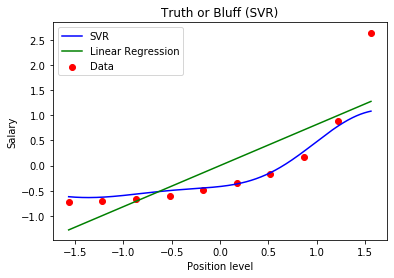

In [10]:
#this step required because data is feature scaled.
x_grid = np.arange(min(X),max(X),0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(X,y, color='red',label='Data')
plt.plot(x_grid, regressor.predict(x_grid), color='blue',label='SVR')
plt.plot(x_grid, lr.predict(x_grid), color='green',label='Linear Regression')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.show()

In [9]:
from sklearn.metrics import r2_score
print('R2 Score of SVR : {:.2f}'.format(r2_score(y,regressor.predict(X))))
print('R2 Score of Linear model : {:.2f}'.format(r2_score(y,lr.predict(X))))

R2 Score of SVR : 0.75
R2 Score of Linear model : 0.67


This is what we get as output- the best fit line that has a maximum number of points. Quite accurate!

# ⚖️ Pros and Cons associated with SVM

<ul>
    <li><b>Pros:</b></li>
    <ul style="list-style-type:circle;">
    <li>It works really well with a clear margin of separation</li>
    <li>It is effective in high dimensional spaces.</li>
    <li>It is effective in cases where the number of dimensions is greater than the number of samples.</li>
    <li>It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.</li>
    </ul>
    <li><b>Cons:</b></li>
    <ul style="list-style-type:circle;">
        <li>It doesn’t perform well when we have large data set because the required training time is higher</li>
        <li>It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping</li>
        <li>SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.</li>
    </ul>
</ul>